# Statistical Learning
---
The use of machine learning techniques with the goal of statistical inference: drawing conclusions from the data at hand

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [2]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

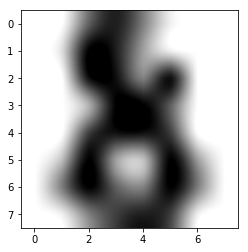

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='spline16')
plt.show()

In [5]:
# To use this dataset with sklearn, we transform each 8x8 image into a feature vector of length 64
data = digits.images.reshape((digits.images.shape[0], -1))

## Nearest neighbor and the curse of dimensionality
---

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer
iris = datasets.load_iris()
iris_X, iris_y = iris.data, iris.target
y_one_hot = LabelBinarizer().fit_transform(iris_y)
np.unique(iris_y)

array([0, 1, 2])

In [7]:
y_one_hot

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [8]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

from sklearn.neighbors import  KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [10]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [11]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

## Linear regression
---

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
regr.coef_

array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01])

In [14]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898223

In [15]:
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905713

## Shrinkage
---
If there are a few data points per dimension, noise in the observations induces high variance

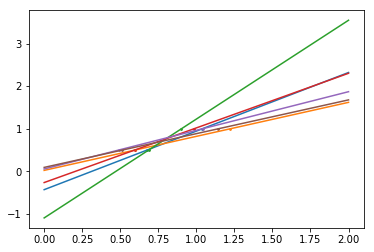

In [16]:
X = np.c_[.5, 1].T
y = [.5, 1]
test = np.c_[0, 2].T
regr = linear_model.LinearRegression()
% matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

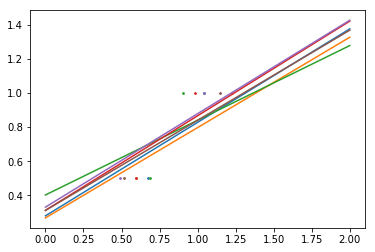

In [17]:
regr = linear_model.Ridge(alpha=.1)
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

In [18]:
# We can choose alpha to minimize left out error, this time using the diabetes dataset rather than our synthetic data
alphas = np.logspace(-4, -1, 6)
from __future__ import print_function
print([regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas])

[0.58511106838835314, 0.58520730154446765, 0.58546775406984919, 0.58555120365039159, 0.58307170855541635, 0.570589994372801]


## Sparsity
---
**Note**: A representation of the diabetes dataset would involve 11 dimensions (10 feature dimensions and one of the target variable). It is hard to develop intuition on suh representation, but it may be useful to keep in mind that it would be a fairly _empty_ space

In [19]:
# Using Lasso (least absolute shrinkage and selection operator) to set some coefficients to zero
# Such methods are called sparse method and sparsity can be seen as an application of Occam's razor: _prefer simpler models_
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]

In [20]:
best_alpha = alphas[scores.index(max(scores))]

In [21]:
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


In [23]:
# The LassoLARS object uses the LARS algorithm which is very efficient for problems
# in which the weight vector estimated is very sparse (ie, problems with very few observations)

## Classification
---
Logistic Regression

In [24]:
# Smaller C pressurises the algorithm more (increases bias)
logreg = linear_model.LogisticRegression(C=1e-5)
logreg.fit(iris_X_train, iris_y_train)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
# C parameter controls the amount of regularization in Logistic Regression
# penalty="l2" gives Shrinkage
# penalty="l1" gives Sparsity
# The distribution of weights is either Gaussian (l2) or Laplacian (l1)
# The impact of the two types of regularization is quite different.
# While they both penalize large weights, l1 regularization leads to a
# non differentiable function at zero. l2 regularization favors smaller weights
# but l1 regularization favors weights that go to zero.
# So, with l1 regularization, you can end up with a sparse model - one 
# with fewer parameters. In both cases the parameters of the l1 and l2 
# regularized models "Shrink", but in case of l1 regularization the shrinkage 
# directly impacts the complexity (the number of parameters) of the model

## Support Vector Machines
---
Regularization is set by the C parameter. Large C means less regularization, ie, margin is calculated on observations close to the separating line. Small C means more regularization, ie, margin is calculated using many or all of the observations around the separating line

In [26]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Kernels**:
1. Linear kernel
    > svm = svm.SVC(kernel='linear')
2. Polynomial kernel
    > svm = svm.SVC(kernel='poly', degree=3)
3. RBF kernel (Radial Basis Function) or Gaussian kernel
    > svm = svm.SVC(kernel='rbf')

## Support Vector Classification on Iris dataset
---

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

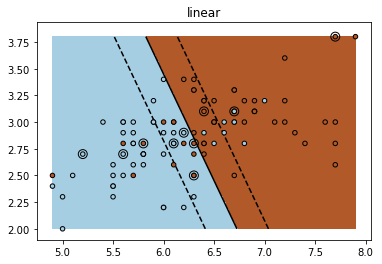

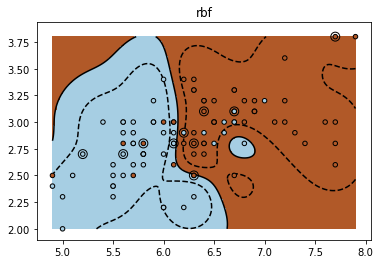

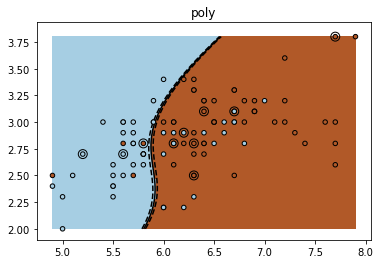

In [28]:
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()
